In [26]:
import gym
import gym_snake
from q_learning_agent import Agent

import matplotlib.pyplot as plt
import numpy as np

In [27]:
def observation2state(observation):
    '''
    observation = (X, Y, x, y) => state number
    '''
    d = env.dim # размер поля (6)
    X = observation[0]
    Y = observation[1]
    x = observation[2]
    y = observation[3]
    return y + d*(x + d*(Y + X*d)) 
   
def plot_learning_curves(scores, scores_100):
    eps = [i*10 for i in range(len(scores))]
    plt.plot(eps, scores, label='очки')
    plt.plot(eps, scores_100, label='среднее за 100')
    plt.xlabel('Эпизоды')
    plt.ylabel('Набрано очков')
    plt.grid()
    plt.legend()
    plt.title('Кривая обучения агента Snake-v0')
    plt.show()
    

In [29]:
env = gym.make('Snake-v0')
agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01,
              eps_dec=0.9999996, n_actions=4, n_states=env.dim**4)

Обучение 

episode 0 mean score -201.00 epsilon 1.00
episode 1000 mean score 41.97 epsilon 0.92
episode 2000 mean score 139.88 epsilon 0.85
episode 3000 mean score 205.24 epsilon 0.79
episode 4000 mean score 280.17 epsilon 0.73
episode 5000 mean score 415.88 epsilon 0.67
episode 6000 mean score 399.08 epsilon 0.62
episode 7000 mean score 382.91 epsilon 0.57
episode 8000 mean score 473.41 epsilon 0.53
episode 9000 mean score 482.69 epsilon 0.49
episode 10000 mean score 578.53 epsilon 0.45
episode 11000 mean score 627.23 epsilon 0.42
episode 12000 mean score 643.97 epsilon 0.38
episode 13000 mean score 603.10 epsilon 0.35
episode 14000 mean score 679.52 epsilon 0.33
episode 15000 mean score 657.04 epsilon 0.30
episode 16000 mean score 812.53 epsilon 0.28
episode 17000 mean score 738.12 epsilon 0.26
episode 18000 mean score 703.37 epsilon 0.24
episode 19000 mean score 690.17 epsilon 0.22
episode 20000 mean score 727.89 epsilon 0.20
episode 21000 mean score 728.90 epsilon 0.19
episode 22000 mean scor

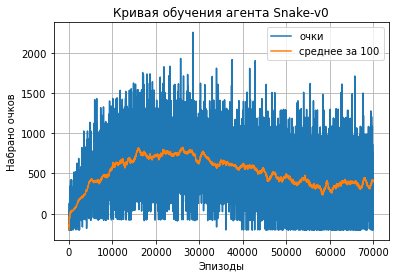

Wall time: 12min 48s


In [30]:
%%time

scores = []
scores_100 = []
n_games = 70000

for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
        state = observation2state(observation)
        action = agent.choose_action(state)
        observation_, reward, done, info = env.step(action)
        state_ = observation2state(observation_)
        agent.learn(state, action, reward, state_)
        score += reward
        observation = observation_
    if i % 10 == 0:
        scores.append(score)
        mean_score = np.mean(scores[-100:])
        scores_100.append(mean_score)
        if i % 1000 == 0:
            print('episode %d mean score %.2f epsilon %.2f' % (i, mean_score, agent.epsilon))
plot_learning_curves(scores, scores_100)

Тестирование

In [31]:
observation = env.reset()
print(observation)
done = False
score = 0
steps = 0
while not done:
    env.render()
    state = observation2state(observation)
    action = agent.choose_action(state)
    observation, reward, done, info = env.step(action)
    score += reward
    steps += 1
    print("step %d action %d => %d, total: %d" % (steps, action, reward, score))
print("End of episode")

(2, 5, 5, 2)
. . . . . . 
. . . . . . 
. . . . . O 
. . . . . . 
. . . . . . 
. . A . . . 
step 1 action 0 => -1, total: -1
. . . . . . 
. . . . . . 
. . . . O . 
. . . . . . 
. . . . . . 
. . A . . . 
step 2 action 0 => -1, total: -2
. . . . . . 
. . . . . . 
. . . O . . 
. . . . . . 
. . . . . . 
. . A . . . 
step 3 action 0 => -1, total: -3
. . . . . . 
. . . . . . 
. . O . . . 
. . . . . . 
. . . . . . 
. . A . . . 
step 4 action 3 => -1, total: -4
. . . . . . 
. . . . . . 
. . . . . . 
. . O . . . 
. . . . . . 
. . A . . . 
step 5 action 3 => -1, total: -5
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . O . . . 
. . A . . . 
step 6 action 3 => 100, total: 95
. . . . . . 
. . . . . . 
. . . . . . 
. . . . . . 
. . o . . . 
. . O A . . 
step 7 action 2 => 100, total: 195
. . . . . . 
. . . . . . 
. . . . . . 
. . . . A . 
. . o . . . 
. . o O . . 
step 8 action 2 => -1, total: 194
. . . . . . 
. . . . . . 
. . . . . . 
. . . . A . 
. . . . . . 
. . o o O . 
step 9 action 1 =

. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 99 action 1 => -2, total: 222
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 100 action 1 => -2, total: 220
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 101 action 1 => -2, total: 218
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 102 action 1 => -2, total: 216
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 103 action 1 => -2, total: 214
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 104 action 1 => -2, total: 212
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 105 action 1 => -2, total: 210
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 106 action 1 => -2, total: 208
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 107 ac

o o o . . . 
o O . . . . 
. . . . . . 
step 197 action 1 => -2, total: 26
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 198 action 1 => -2, total: 24
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 199 action 1 => -2, total: 22
. . . . . . 
. . . . . . 
. . . . A . 
o o o . . . 
o O . . . . 
. . . . . . 
step 200 action 1 => -2, total: 20
End of episode
